# Tesla TIME SERIES FORECASTING

## imports

In [69]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../')

# !pip install pmdarima

In [3]:
%load_ext autoreload
%autoreload 2

from utils import *

In [4]:
tesla = yf.Ticker('TSLA') 
tesla_data= tesla.history(period='max') 

# tesla_data.index = pd.to_datetime(tesla_data.index)
tesla_data = tesla_data.asfreq('B')
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500.0,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500.0,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000.0,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000.0,0.0,0.0
2010-07-05 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tesla_data.dropna(how='all', inplace=True)

In [6]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3582 entries, 2010-06-29 00:00:00-04:00 to 2024-09-20 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3582 non-null   float64
 1   High          3582 non-null   float64
 2   Low           3582 non-null   float64
 3   Close         3582 non-null   float64
 4   Volume        3582 non-null   float64
 5   Dividends     3582 non-null   float64
 6   Stock Splits  3582 non-null   float64
dtypes: float64(7)
memory usage: 223.9 KB


In [7]:
tesla_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3582.000000,3582.000000,3582.000000,3582.000000,3.582000e+03,3582.0,3582.000000
mean,76.957397,78.646596,75.163260,76.939771,9.678737e+07,0.0,0.002233
std,102.992662,105.282647,100.507290,102.920658,7.830241e+07,0.0,0.097414
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,11.746334,12.031500,11.416000,11.809000,4.821750e+07,0.0,0.000000
50%,17.569334,17.815333,17.312000,17.549666,8.203705e+07,0.0,0.000000
75%,169.047501,174.177502,166.544998,170.022499,1.225157e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000


In [8]:
# def plot_stockline (df, col):
#     plt.figure(figsize=(10,6))
#     plt.grid(True)
#     plt.plot(df[col])

#     if col in ['Open', 'High', 'Low', 'Close']:
#         plt.ylabel(f'{col} Price')
#         plt.title(f'Telsa {col} price')

#     else:
#         plt.ylabel(col)
#         plt.title(f'Telsa {col}')
        
#     plt.show()
# plot_stockline (tesla_data, 'Open')

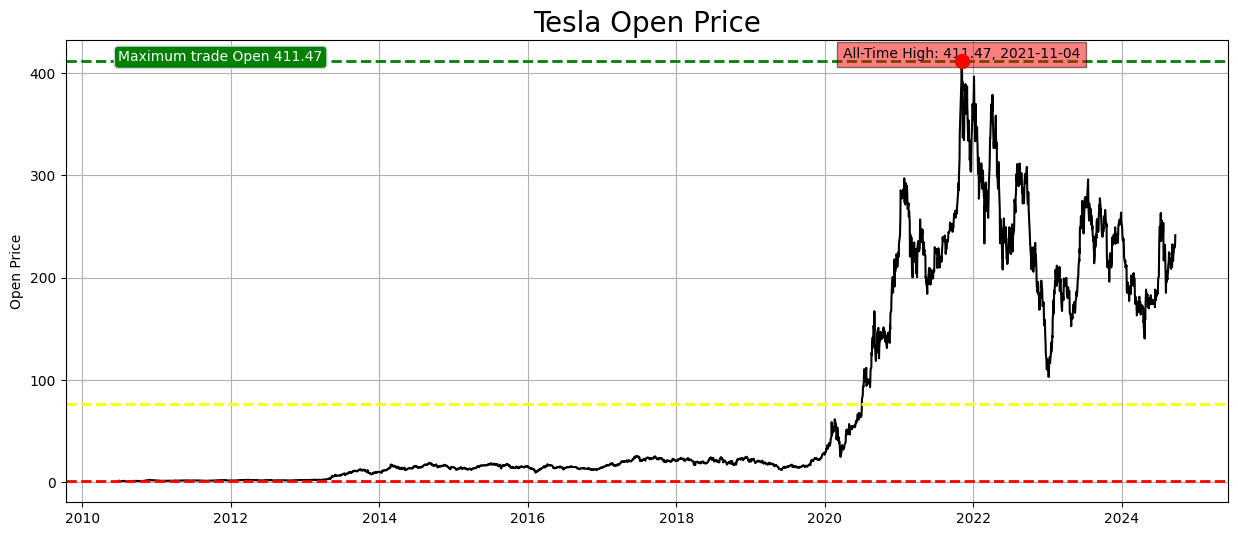

In [11]:
plot_stockline (tesla_data, 'Open', 'Tesla')

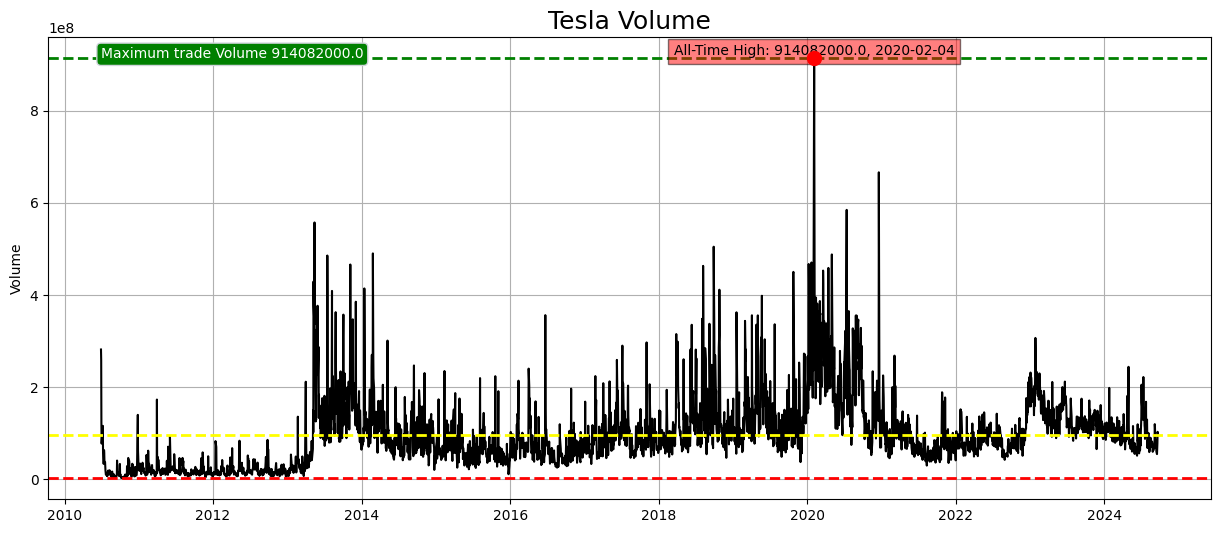

In [12]:
plot_stockline (tesla_data, 'Volume', 'Tesla')

<Axes: xlabel='Date'>

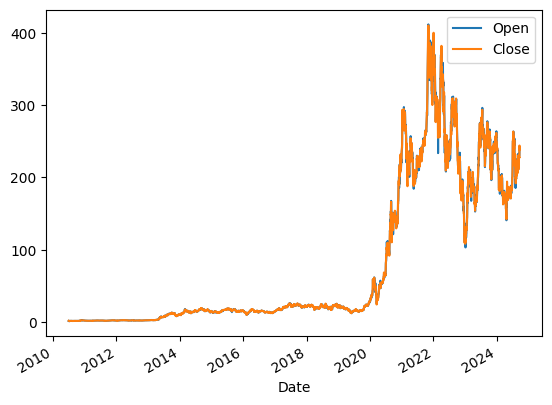

In [13]:
tesla_data[['Open', 'Close']].plot()

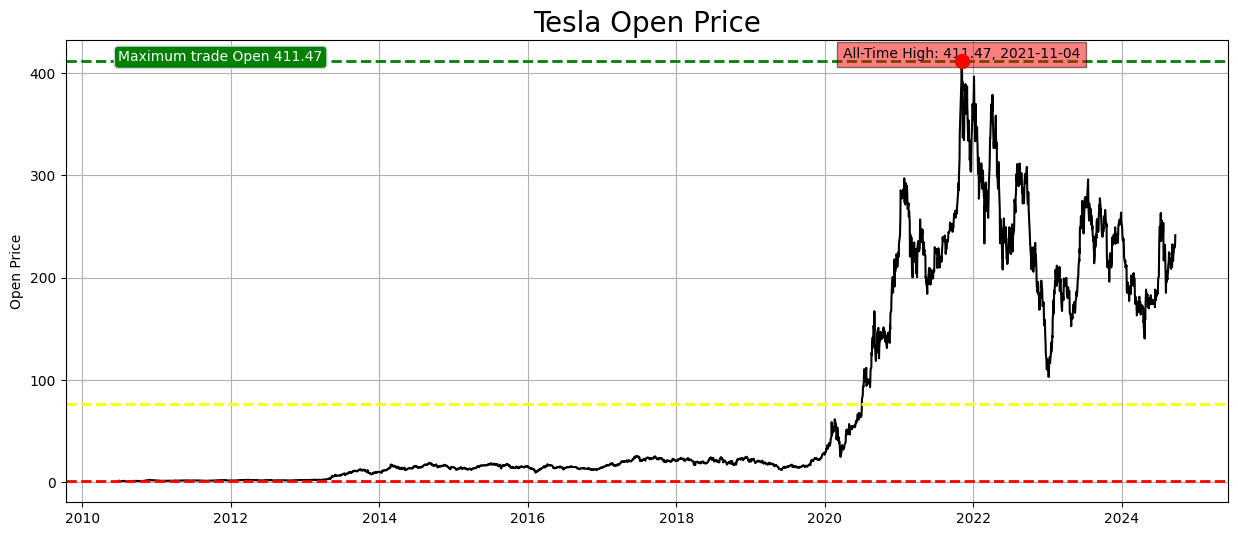

In [14]:
plot_stockline (tesla_data, 'Open', 'Tesla')

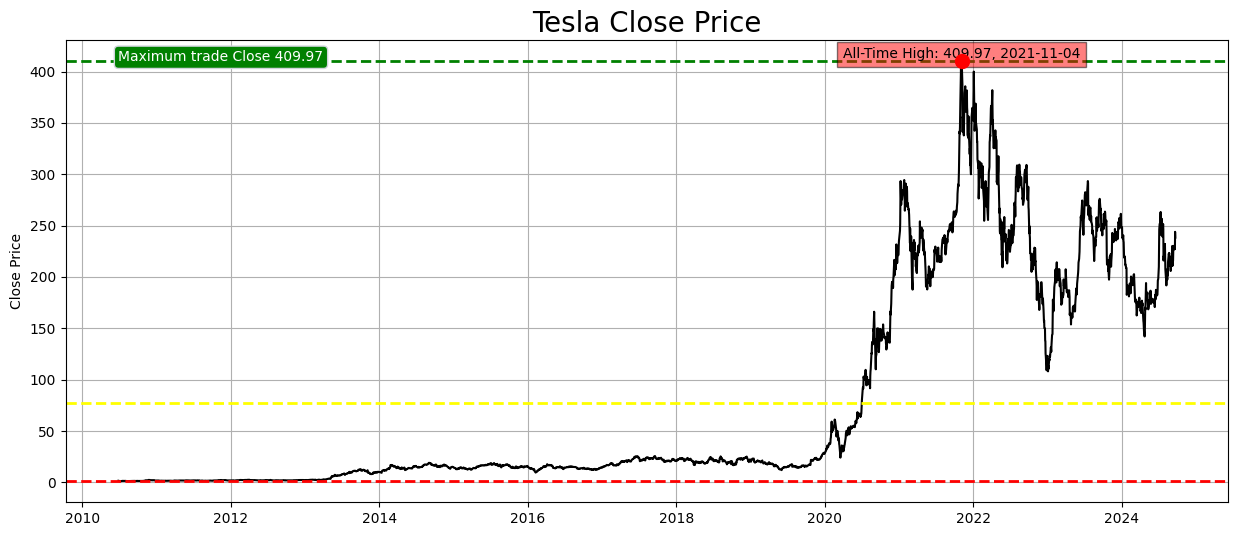

In [15]:
plot_stockline (tesla_data, 'Close', 'Tesla')


## Filter Year

In [16]:
tesla_data['date']=tesla_data.index
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500.0,0.0,0.0,2010-06-29 00:00:00-04:00
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500.0,0.0,0.0,2010-06-30 00:00:00-04:00
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000.0,0.0,0.0,2010-07-01 00:00:00-04:00
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000.0,0.0,0.0,2010-07-02 00:00:00-04:00
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500.0,0.0,0.0,2010-07-06 00:00:00-04:00


In [17]:
tesla_over_2020=tesla_data[tesla_data['date'].dt.year >= 2020].copy()

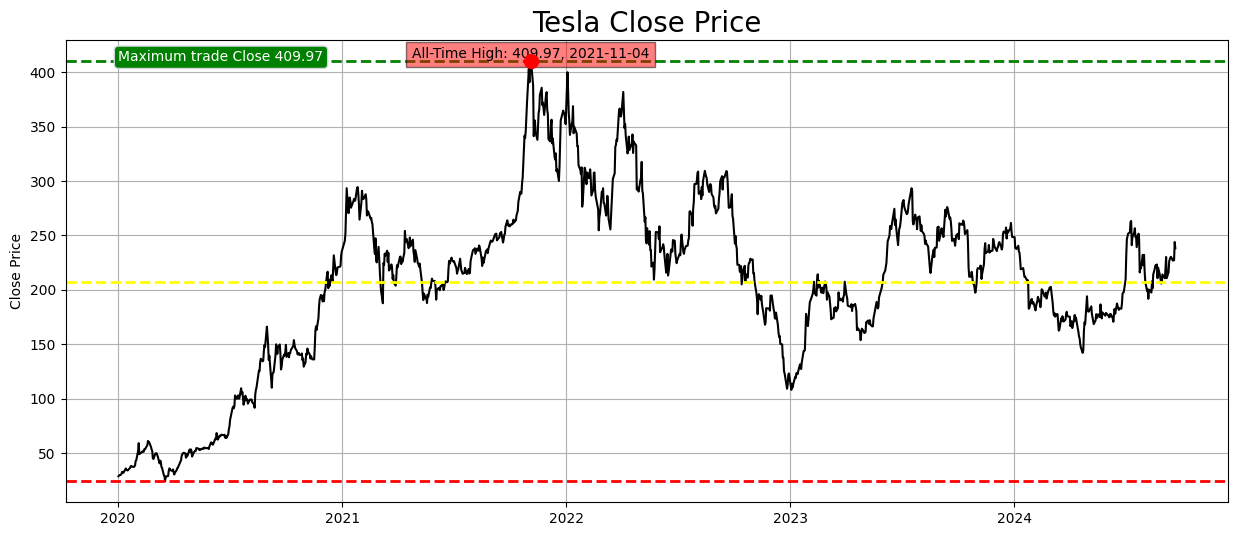

In [18]:
plot_stockline(tesla_over_2020,  'Close', 'Tesla')

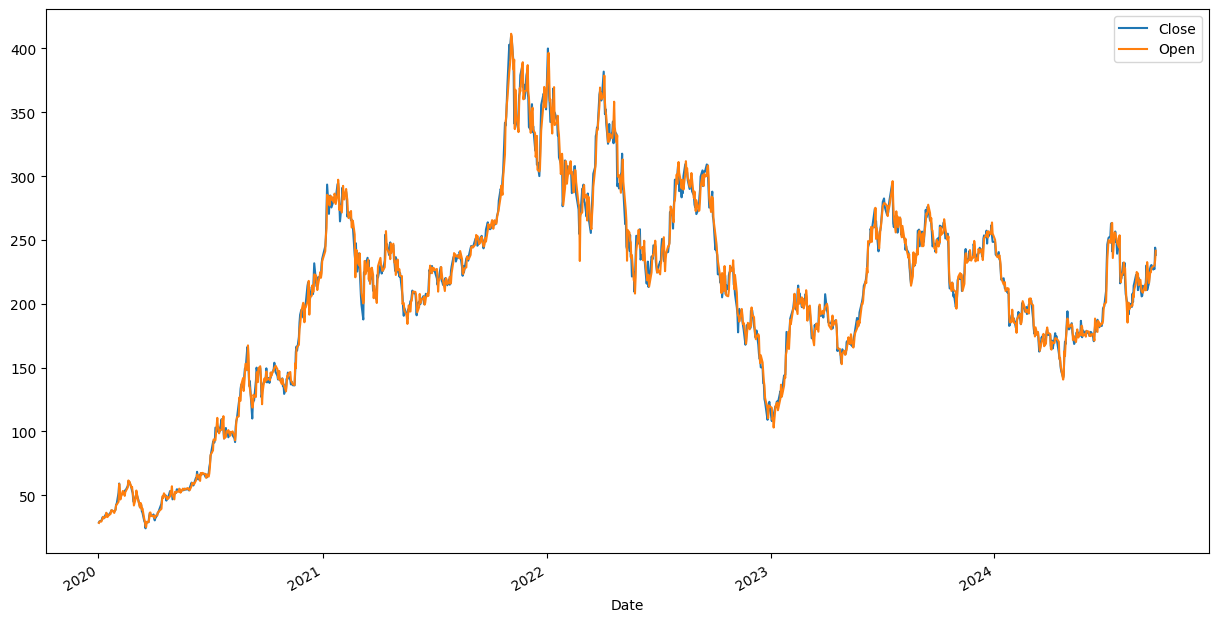

In [19]:
tesla_over_2020[['Close', 'Open']].plot(figsize=(15, 8));

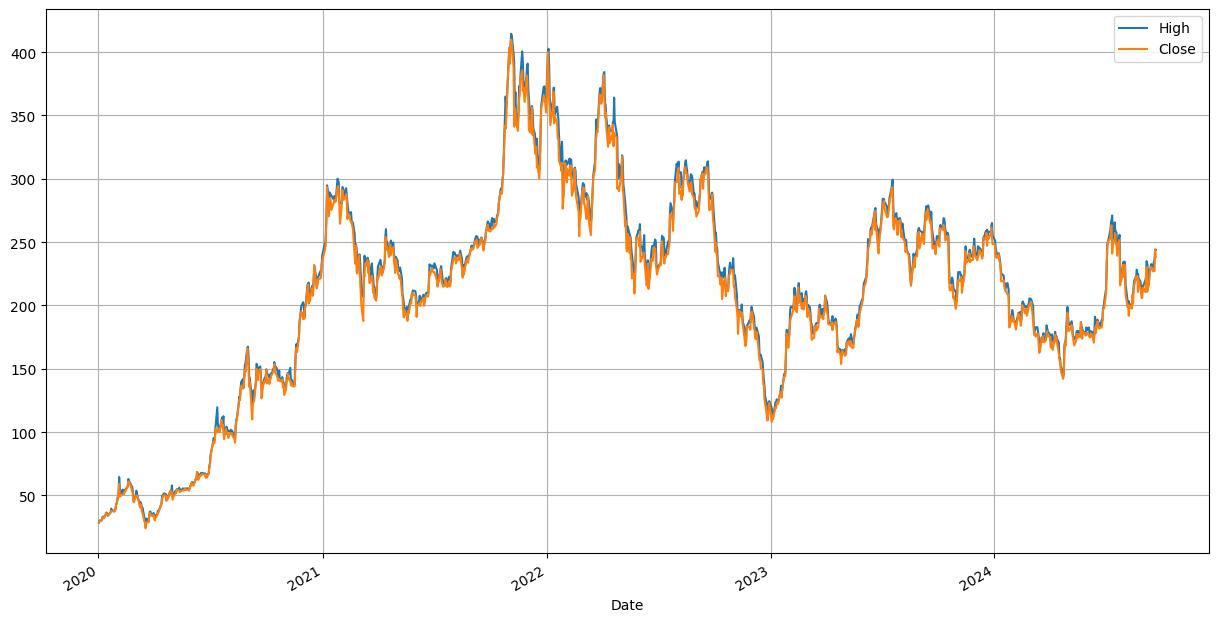

In [20]:
tesla_over_2020[['High', 'Close']].plot(figsize=(15, 8), grid=True);

<Axes: xlabel='Date'>

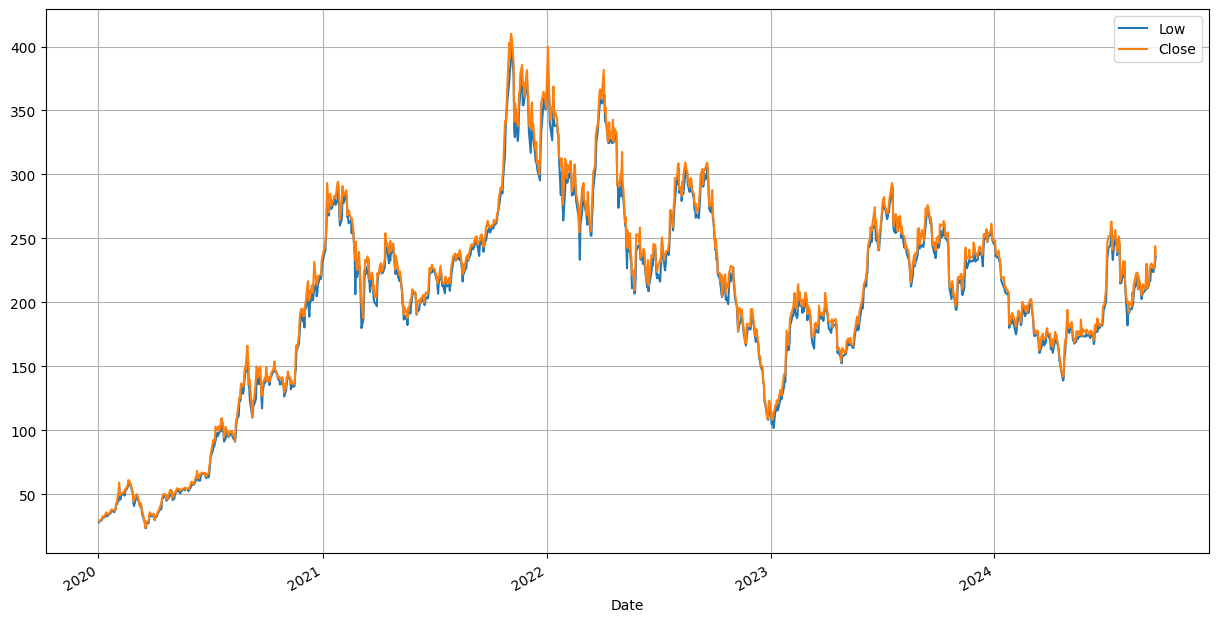

In [21]:
tesla_over_2020[['Low', 'Close']].plot(figsize=(15, 8), grid=True)

In [22]:
# tesla_data[tesla_data['date'].dt.year.between('2020', '2024')]

In [23]:
tesla_data['Close'].max()

409.9700012207031

In [24]:
tesla_data['Close'].idxmax()

Timestamp('2021-11-04 00:00:00-0400', tz='America/New_York')

In [25]:
# plot_candlestick(tesla_over_2020)

## Moving Averages

Smooths out price data to help identify trends over a specific period. Common moving averages include 50-day and 200-day moving averages.

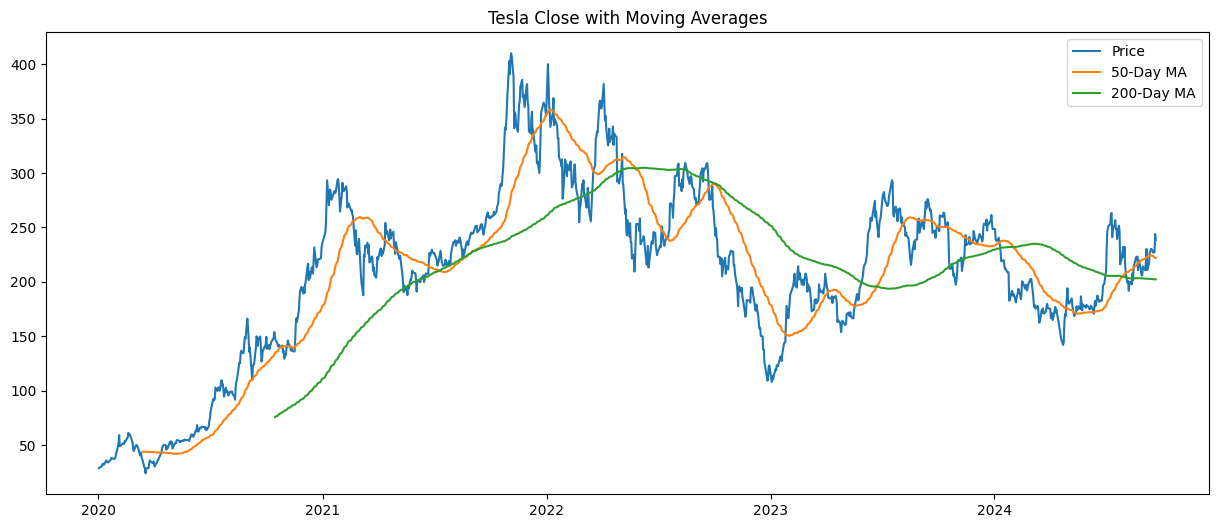

In [27]:
plot_with_moving_averages(tesla_over_2020, 'Close', 'Tesla')

## Volume Analysis
 Analyzes the trading volume to understand the intensity of trading during price movements. It helps identify buying/selling pressure.

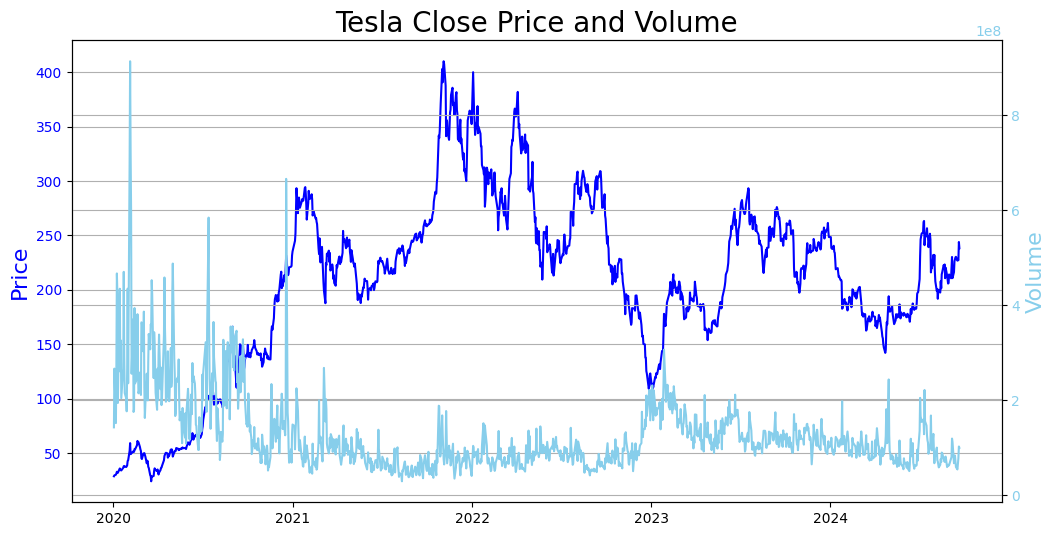

In [28]:
plot_price_with_volume(tesla_over_2020, 'Tesla')

## Relative Strength Index (RSI)

Measures the magnitude of recent price changes to evaluate overbought or oversold conditions. RSI values above 70 indicate overbought conditions, while values below 30 indicate oversold conditions.

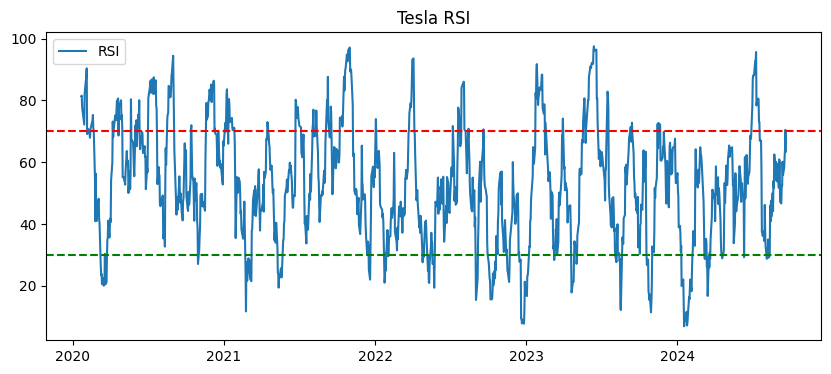

In [30]:
plot_rsi(tesla_over_2020, 'Tesla')

## Bollinger Bands
Purpose: Indicates the volatility of the stock by plotting lines two standard deviations away from a simple moving average. Helps identify potential breakout points.

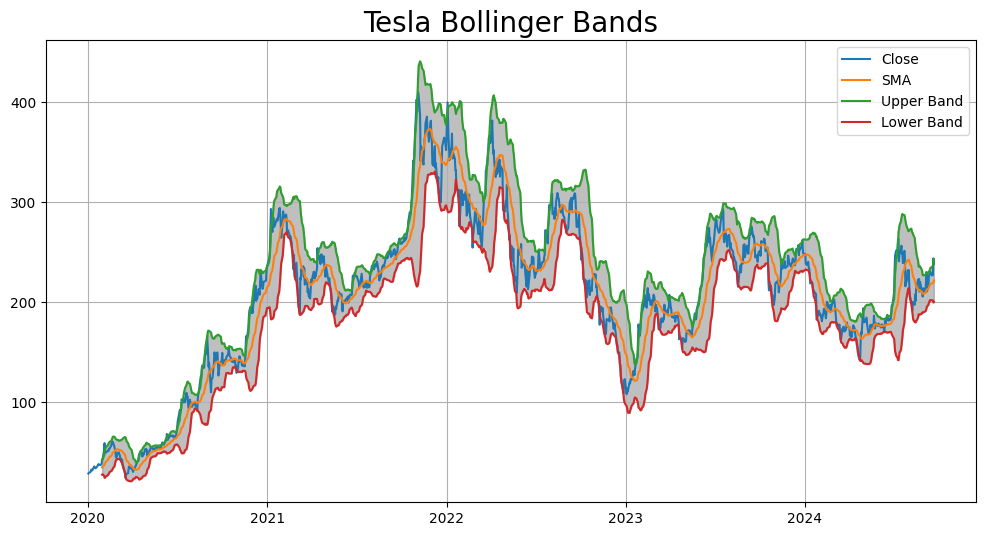

In [31]:
plot_bollinger_bands(tesla_over_2020, 'Tesla')

## MACD (Moving Average Convergence Divergence)
Purpose: Shows the relationship between two moving averages of a stock’s price and is used to identify potential buy or sell signals.

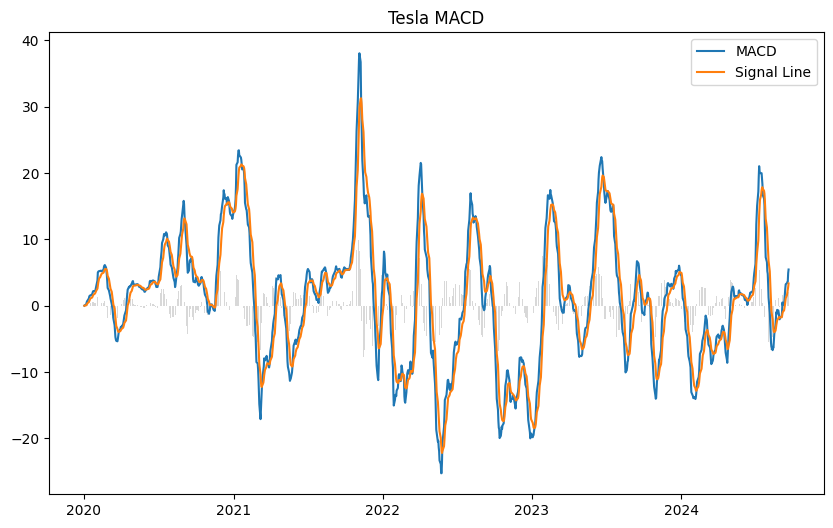

In [37]:

plot_macd(tesla_over_2020, company='Tesla')

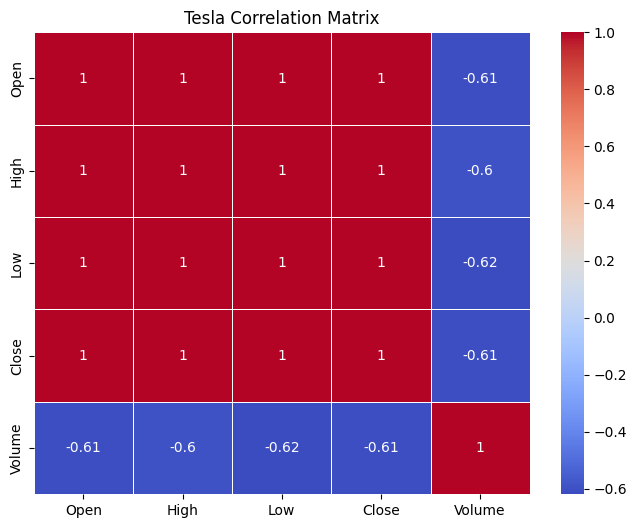

In [39]:
plot_correlation_matrix(tesla_over_2020[['Open', 'High', 'Low', 'Close', 'Volume']], company='Tesla')

<Axes: ylabel='Density'>

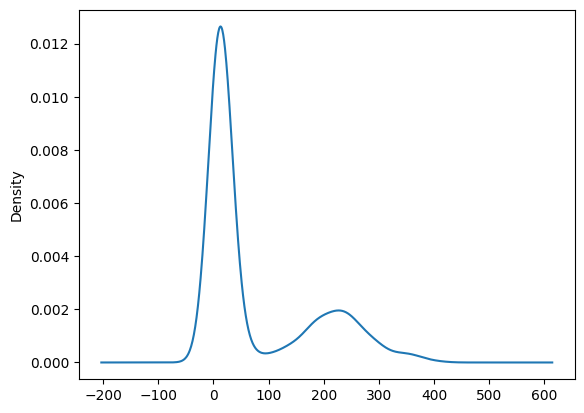

In [ ]:
tesla_data['Close'].plot(kind='kde')

<Axes: ylabel='Density'>

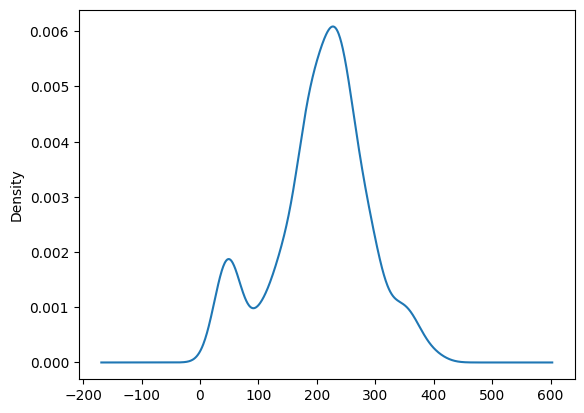

In [40]:
tesla_over_2020['Close'].plot(kind='kde')


# Machine Learning
Autoregressive Integrated Moving Average (ARIMA) model

Before applying forecasting models like ARIMA, it's generally important to check for trend and seasonality. ARIMA models are best suited for stationary data, meaning data without a trend or seasonality. If these components are present, they can be removed through differencing or decomposition.

## component of time Series Analysis
`Level`: average value in the series

`Trend`: increasing or falling value

`Seasonality`:recurring short-term cycle

`Noise`: random variance

## Check for Trend and Seasonality

### Adfuller

ADF (Augmented Dickey-Fuller) Test is used here to determine if the series is stationary.

The ADF test helps determine whether differencing is needed. If the original data fails the test (p-value > 0.05), we apply differencing. After differencing, the ADF test should return a p-value < 0.05, indicating stationarity

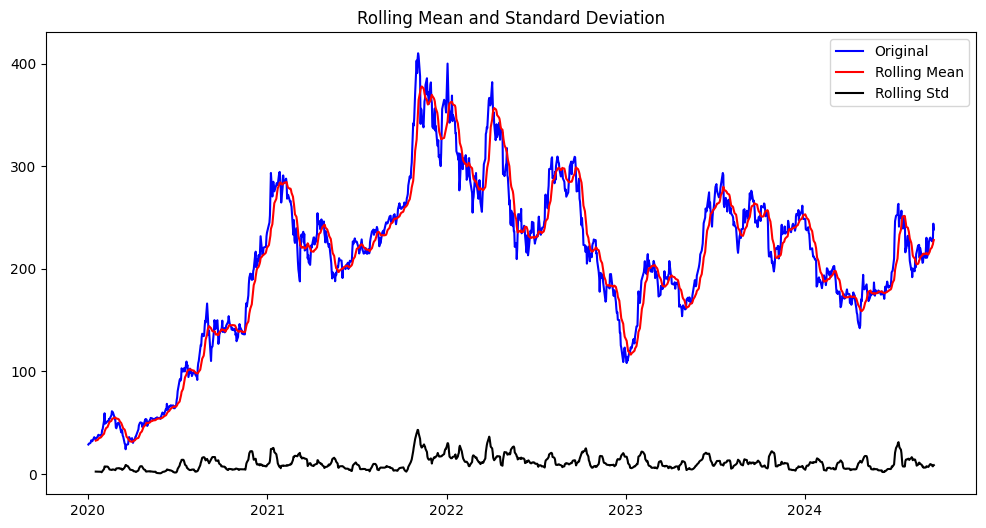

Results of dickey fuller test
Test Statistics                  -2.619035
p-value                           0.089127
No. of lags used                 10.000000
Number of observations used    1177.000000
critical value (1%)              -3.435918
critical value (5%)              -2.863999
critical value (10%)             -2.568079
dtype: float64


In [41]:
test_stationarity(tesla_over_2020['Close'])

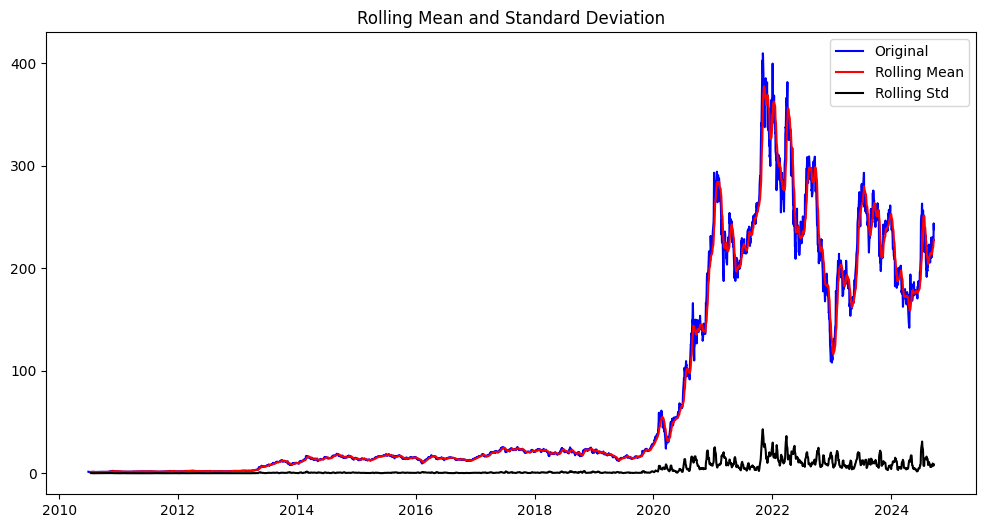

Results of dickey fuller test
Test Statistics                  -1.056711
p-value                           0.732023
No. of lags used                 29.000000
Number of observations used    3552.000000
critical value (1%)              -3.432192
critical value (5%)              -2.862354
critical value (10%)             -2.567203
dtype: float64


In [42]:
test_stationarity(tesla_data['Close'])

From the above cell the p-value is 0.692722, which is greater than 0.05. This indicates that the data is not stationary and thus has a trend or seasonality that needs to be removed.

### Seasonal decompose
The function seasonal_decompose is used to decompose a time series into its seasonal, trend, and residual components.

<Figure size 640x480 with 0 Axes>

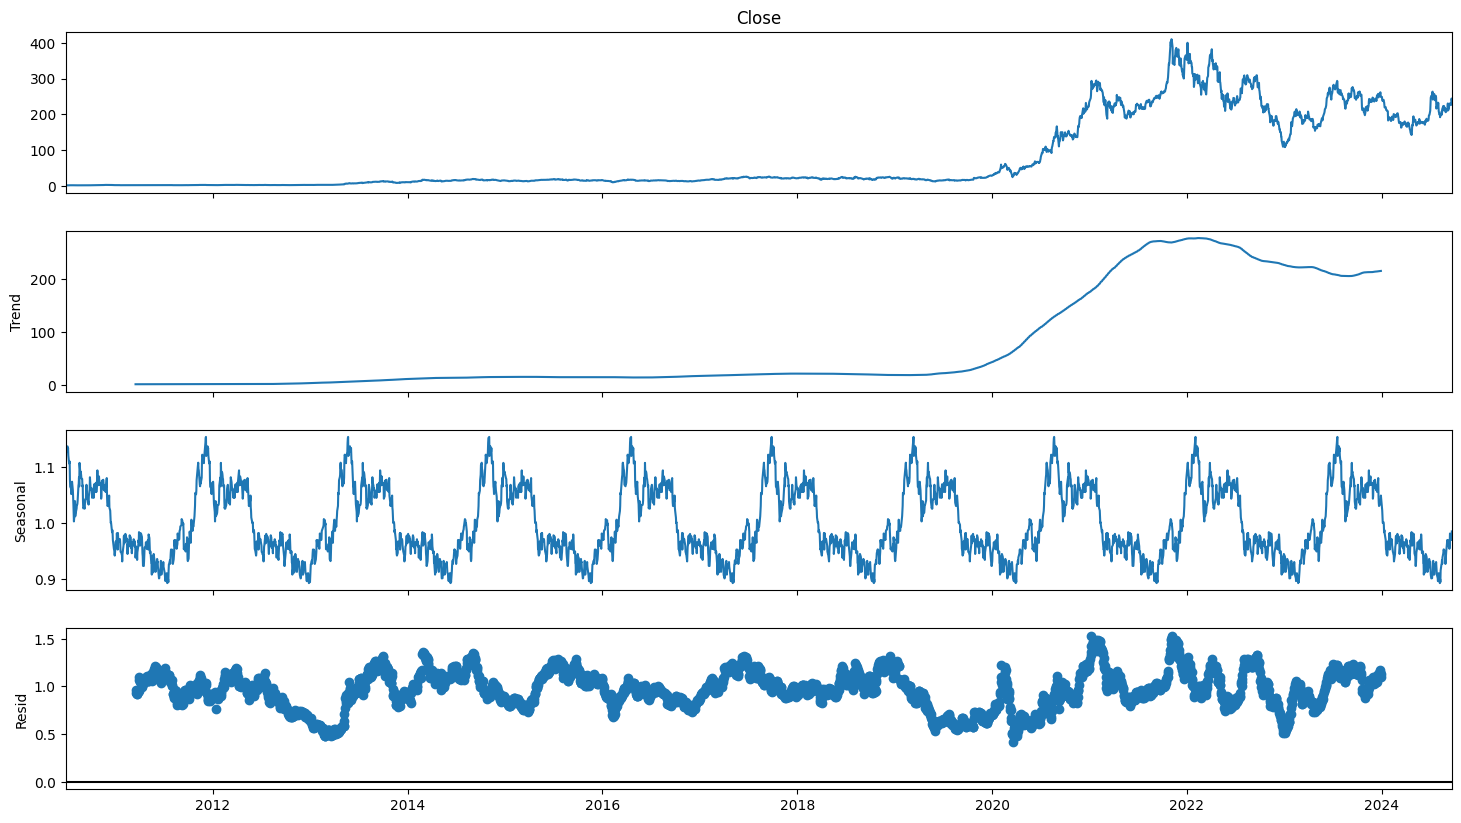

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_close = tesla_data['Close'].asfreq('D').dropna()
decompose_result = seasonal_decompose(df_close, model='multiplicative', period = 365)
# decompose_result = seasonal_decompose(tesla_data['Close'], model='additive', period = 30)
fig = plt.figure()  
fig = decompose_result.plot()  
fig.set_size_inches(16, 9)
plt.show()

## Eliminate Seasonality and Trend
It is essential to eliminate trends and seasonality from the data because time series analysis only works with stationary data. Eleminating trends and seasonality will ensure data is stationary.

Apply differencing to make the data stationary

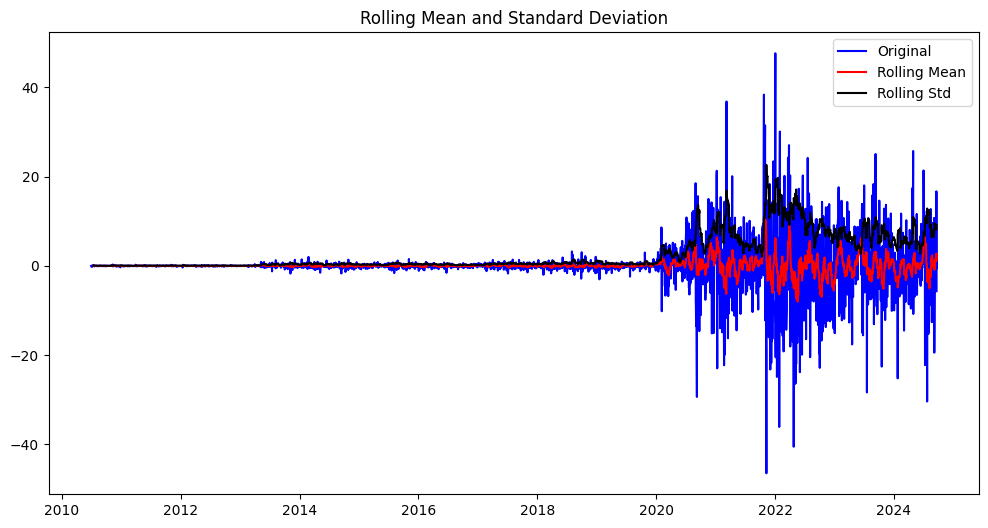

Results of dickey fuller test
Test Statistics               -1.150001e+01
p-value                        4.515574e-21
No. of lags used               2.800000e+01
Number of observations used    3.552000e+03
critical value (1%)           -3.432192e+00
critical value (5%)           -2.862354e+00
critical value (10%)          -2.567203e+00
dtype: float64


In [44]:
df_close_diff = df_close.diff().dropna()

# Perform ADF test on the differenced data
test_stationarity(df_close_diff)

`Before differencing:`
The p-value is 0.692722, which is greater than 0.05.

`After differencing:`
The p-value is 4.237106e-21, which is significantly less than 0.05. 

This means the data is now stationary after differencing, making it suitable for applying the ARIMA model.

## Split Data into Training and Test Sets


In [45]:

def arima_split(df, size=0.95):
    size = int(len(df)*size)
    train_df = (df['y'])[:size]
    test_df = (df['y'])[size:]
    
    print(f"Train Size: {len(train_df)}, Test Size: {len(test_df)}")
    print("-------------------------------")
    
    return train_df, test_df

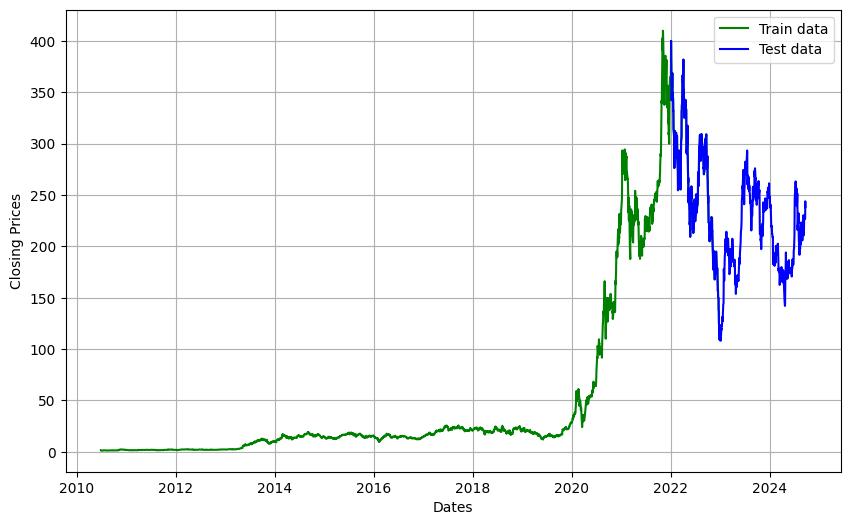

In [46]:
train_data, test_data = df_close[:'2022'], df_close['2022':]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

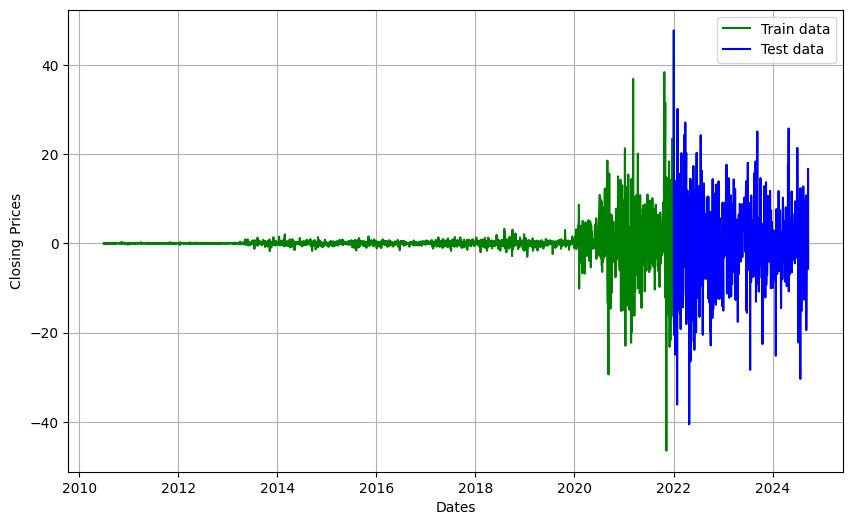

In [47]:
# Train-test split after differencing
train_data, test_data = df_close_diff[:'2022'], df_close_diff['2022':]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

## Finding best param

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18282.942, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=18280.516, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=18280.676, Time=0.58 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=18281.475, Time=0.51 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=18280.984, Time=1.52 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=18282.937, Time=2.82 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=18282.256, Time=0.47 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 6.427 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3149
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -9138.258
Date:                Mon, 23 Sep 2024   AIC                          18280.516
Time:                        17:18:45   BIC                          18292.625
Sample:         

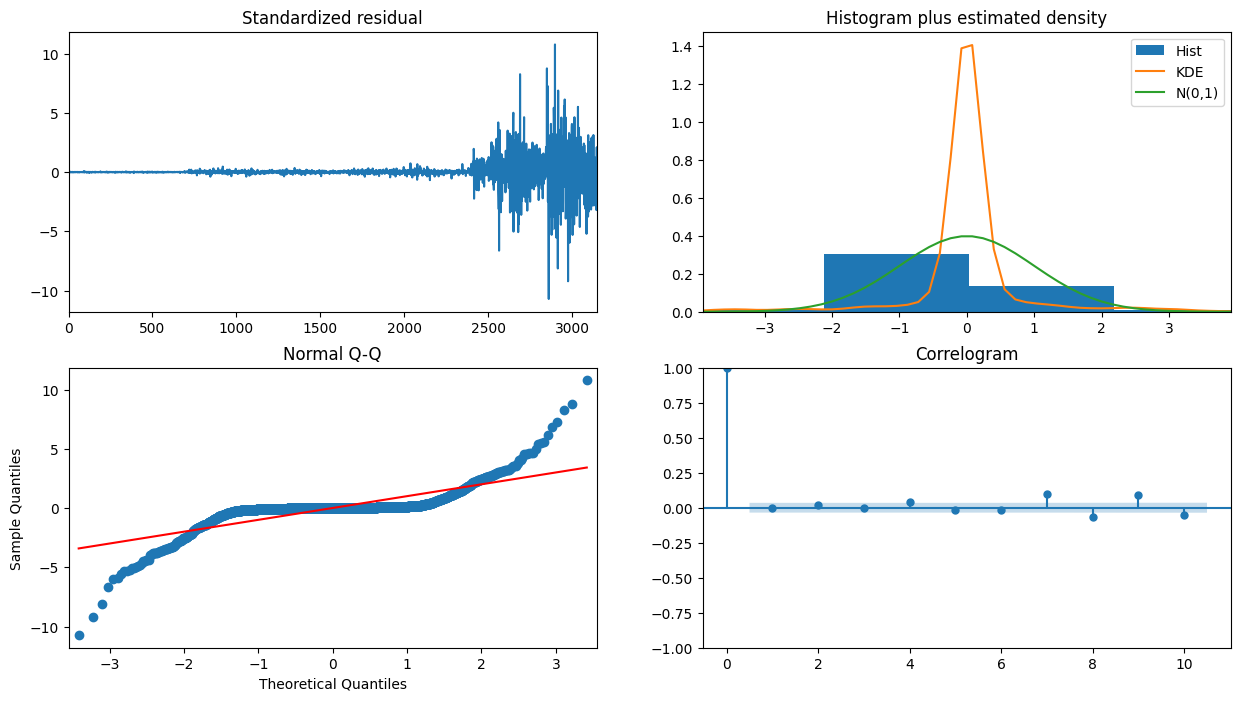

In [48]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

## Fit Arima model

In [49]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,0,0))  
fitted = model.fit()  
print(fitted.summary())

c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3149
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9138.128
Date:                Mon, 23 Sep 2024   AIC                          18282.256
Time:                        17:18:48   BIC                          18300.420
Sample:                             0   HQIC                         18288.773
                               - 3149                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0386      0.076      0.509      0.611      -0.110       0.187
ar.L1         -0.0376      0.008     -4.866      0.000      -0.053      -0.022
sigma2        19.4118      0.134    144.813      0.0

https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/

c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


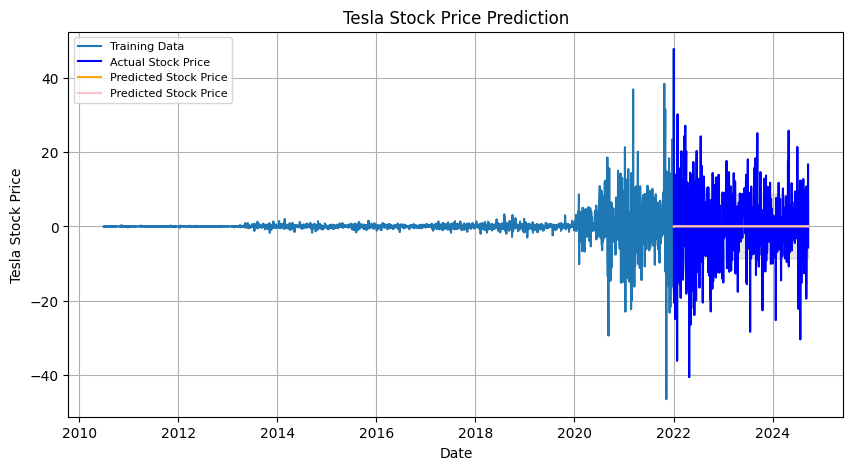

In [50]:
# Forecast for the next 321 periods
forecast_obj = fitted.get_forecast(steps=test_data.shape[0])
forecast_obj.index =test_data.index

forecast_diff = fitted.forecast(steps=test_data.shape[0])
forecast_diff.index =test_data.index

# Get forecast mean (predicted values)
fc_series = forecast_obj.predicted_mean
fc_series.index =test_data.index
# forecast_index=fc_series.index 

# Make forecast as pandas Series
conf = forecast_obj.conf_int(alpha=0.05)
lower_series = conf['lower Close']
lower_series.index =test_data.index
upper_series = conf['upper Close']
upper_series.index =test_data.index

# Plot the results
plt.figure(figsize=(10, 5), dpi=100)

# Plot training data
plt.plot(train_data, label='Training Data')

# Plot actual stock price (test data)
plt.plot(test_data, color='blue', label='Actual Stock Price')

# Plot predicted stock price
plt.plot(fc_series, color='orange', label='Predicted Stock Price')


plt.plot(forecast_diff, color='pink', label='Predicted Stock Price')

# Plot confidence intervals
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)

# Add labels and title
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Tesla Stock Price')

# Show legend
plt.legend(loc='upper left', fontsize=8)

# Show plot
plt.grid(True)
plt.show()


c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction

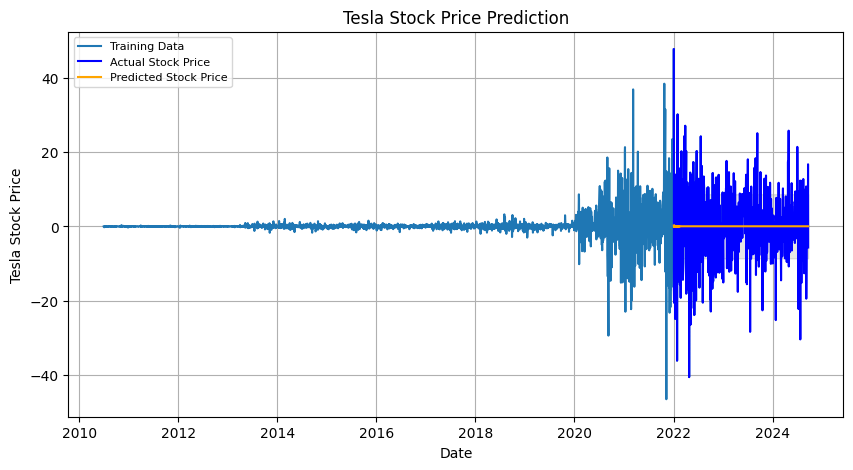

In [51]:
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit() 
forecast_obj = fitted.get_forecast(steps=test_data.shape[0])


# Get forecast mean (predicted values)
fc_series = forecast_obj.predicted_mean
fc_series.index =test_data.index
forecast_index=fc_series.index 

# Make forecast as pandas Series
conf = forecast_obj.conf_int(alpha=0.05)
lower_series = conf['lower Close']
lower_series.index =test_data.index
upper_series = conf['upper Close']
upper_series.index =test_data.index

# Plot the results
plt.figure(figsize=(10, 5), dpi=100)

# Plot training data
plt.plot(train_data, label='Training Data')

# Plot actual stock price (test data)
plt.plot(test_data, color='blue', label='Actual Stock Price')

# Plot predicted stock price
plt.plot(fc_series, color='orange', label='Predicted Stock Price')

# Plot confidence intervals
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)

# Add labels and title
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Tesla Stock Price')

# Show legend
plt.legend(loc='upper left', fontsize=8)

# Show plot
plt.grid(True)
plt.show()


In [52]:
upper_series

Date
2022-01-03 00:00:00-05:00    8.863042
2022-01-04 00:00:00-05:00    8.513534
2022-01-05 00:00:00-05:00    8.836619
2022-01-06 00:00:00-05:00    8.538835
2022-01-07 00:00:00-05:00    8.814044
                               ...   
2024-09-16 00:00:00-04:00    8.683022
2024-09-17 00:00:00-04:00    8.683022
2024-09-18 00:00:00-04:00    8.683022
2024-09-19 00:00:00-04:00    8.683022
2024-09-20 00:00:00-04:00    8.683022
Name: upper Close, Length: 683, dtype: float64

In [53]:
train_data, test_data = df_close_diff[:'2022'], df_close_diff['2022':]

model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit() 


c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [54]:
def undiff (df_undiff, df_diff_):
    df_diff=df_diff_.copy()
    # forecast_diff.index = pd.date_range(start=test_data_undiff.index[-1], periods=forecast_steps+1, freq='B')[1:]
    result = df_diff.cumsum()+df_undiff.iloc[0] 
    return result


In [55]:
train_data_undiff, test_data_undiff = df_close[:'2022'], df_close['2022':]

In [56]:
test_data_undiff

Date
2022-01-03 00:00:00-05:00    399.926666
2022-01-04 00:00:00-05:00    383.196655
2022-01-05 00:00:00-05:00    362.706665
2022-01-06 00:00:00-05:00    354.899994
2022-01-07 00:00:00-05:00    342.320007
                                ...    
2024-09-16 00:00:00-04:00    226.779999
2024-09-17 00:00:00-04:00    227.869995
2024-09-18 00:00:00-04:00    227.199997
2024-09-19 00:00:00-04:00    243.919998
2024-09-20 00:00:00-04:00    238.250000
Name: Close, Length: 683, dtype: float64

In [57]:
undiff (test_data_undiff, test_data)

Date
2022-01-03 00:00:00-05:00    447.593323
2022-01-04 00:00:00-05:00    430.863312
2022-01-05 00:00:00-05:00    410.373322
2022-01-06 00:00:00-05:00    402.566650
2022-01-07 00:00:00-05:00    389.986664
                                ...    
2024-09-16 00:00:00-04:00    274.446655
2024-09-17 00:00:00-04:00    275.536652
2024-09-18 00:00:00-04:00    274.866653
2024-09-19 00:00:00-04:00    291.586655
2024-09-20 00:00:00-04:00    285.916656
Name: Close, Length: 683, dtype: float64

In [58]:
fc_series

Date
2022-01-03 00:00:00-05:00    0.220531
2022-01-04 00:00:00-05:00   -0.129277
2022-01-05 00:00:00-05:00    0.193592
2022-01-06 00:00:00-05:00   -0.104412
2022-01-07 00:00:00-05:00    0.170642
                               ...   
2024-09-16 00:00:00-04:00    0.038623
2024-09-17 00:00:00-04:00    0.038623
2024-09-18 00:00:00-04:00    0.038623
2024-09-19 00:00:00-04:00    0.038623
2024-09-20 00:00:00-04:00    0.038623
Name: predicted_mean, Length: 683, dtype: float64

In [59]:
forecast_obj.predicted_mean

3149    0.220531
3150   -0.129277
3151    0.193592
3152   -0.104412
3153    0.170642
          ...   
3827    0.038623
3828    0.038623
3829    0.038623
3830    0.038623
3831    0.038623
Name: predicted_mean, Length: 683, dtype: float64

In [60]:
forecast_obj.predicted_mean.cumsum() + test_data_undiff.iloc[0]

3149    400.147197
3150    400.017920
3151    400.211512
3152    400.107100
3153    400.277742
           ...    
3827    426.246018
3828    426.284641
3829    426.323263
3830    426.361886
3831    426.400509
Name: predicted_mean, Length: 683, dtype: float64

c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


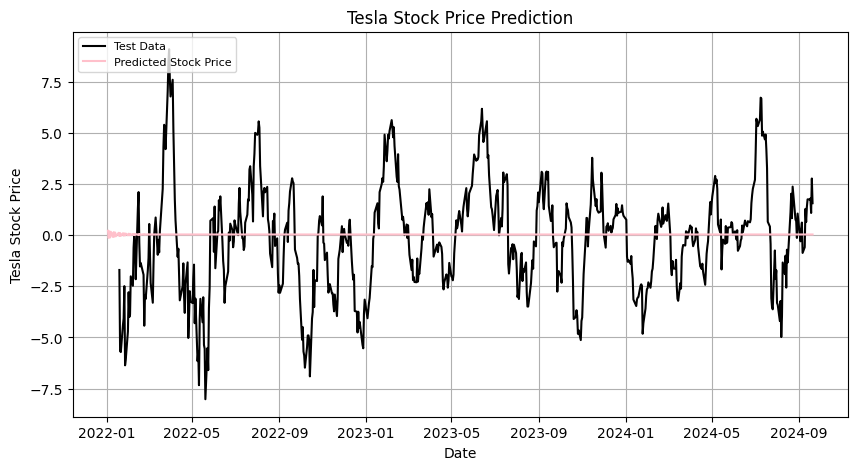

In [61]:

forecast_steps=test_data.shape[0]
forecast_obj = fitted.get_forecast(steps=forecast_steps)

forecast_diff = fitted.forecast(steps=forecast_steps)

# Revert differencing to get actual forecasted stock prices
# forecast_diff.index = pd.date_range(start=test_data.index[-1], periods=forecast_steps+1, freq='B')[1:]
# forecast = df_close.iloc[-1] + forecast_diff.cumsum()

# # Get forecast mean (predicted values)
fc = forecast_obj.predicted_mean
fc.index =test_data.index
# fc_series= undiff (test_data, forecast_diff)

fc_series.index=test_data.index
# forecast_index=fc_series.index 

# # Make forecast as pandas Series
conf = forecast_obj.conf_int(alpha=0.05)
conf.index =test_data.index

lower_series = conf['lower Close']
# lower_series= undiff (df_close['2022':], lower_series)
# lower_series.index =test_data.index
upper_series = conf['upper Close']
# upper_series.index =test_data.index
# upper_series= undiff (df_close['2022':], upper_series)

# Plot the results
plt.figure(figsize=(10, 5), dpi=100)

# Plot training data
# plt.plot(train_data_undiff, label='Training Data')
# plt.plot(test_data_undiff, label='Test Data', color='red')
plt.plot(test_data.rolling(12).mean(), label='Test Data', color='black')
plt.plot(fc, color='pink', label='Predicted Stock Price')

# Add labels and title
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Tesla Stock Price')

# Show legend
plt.legend(loc='upper left', fontsize=8)

# Show plot
plt.grid(True)
plt.show()


### eva

In [67]:
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 78.91616023343792
MAE: 6.445634915265389
RMSE: 8.883476809979182
MAPE: inf


In [ ]:
test_data

Date
2022-01-03 00:00:00-05:00    47.666656
2022-01-04 00:00:00-05:00   -16.730011
2022-01-05 00:00:00-05:00   -20.489990
2022-01-06 00:00:00-05:00    -7.806671
2022-01-07 00:00:00-05:00   -12.579987
                               ...    
2024-08-29 00:00:00-04:00     0.529999
2024-08-30 00:00:00-04:00     7.830002
2024-09-03 00:00:00-04:00    -3.509995
2024-09-04 00:00:00-04:00     8.809998
2024-09-05 00:00:00-04:00    10.759995
Name: Close, Length: 672, dtype: float64

In [ ]:
fc_series

3149    0.220531
3150   -0.129277
3151    0.193592
3152   -0.104412
3153    0.170642
          ...   
3816    0.038623
3817    0.038623
3818    0.038623
3819    0.038623
3820    0.038623
Name: predicted_mean, Length: 672, dtype: float64

In [ ]:
conf.iloc[:, 0].cumsum() + test_data_undiff.iloc[0]

Date
2022-01-03 00:00:00-05:00     391.504686
2022-01-04 00:00:00-05:00     382.732598
2022-01-05 00:00:00-05:00     374.283163
2022-01-06 00:00:00-05:00     365.535503
2022-01-07 00:00:00-05:00     357.062744
                                ...     
2024-08-29 00:00:00-04:00   -5348.624218
2024-08-30 00:00:00-04:00   -5357.229995
2024-09-03 00:00:00-04:00   -5365.835771
2024-09-04 00:00:00-04:00   -5374.441548
2024-09-05 00:00:00-04:00   -5383.047325
Name: lower Close, Length: 672, dtype: float64

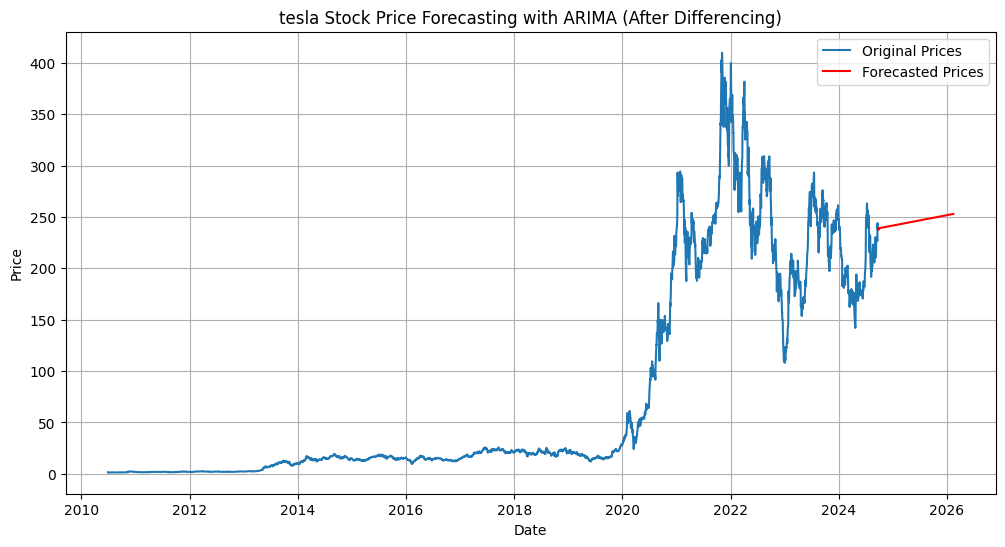

In [70]:
model = ARIMA(train_data, order=(5, 1, 2))  # p=5, d=1, q=2 are just an example
model_fit = model.fit()

# Forecast for the next 50 periods
forecast_steps = 365
forecast_diff = model_fit.forecast(steps=forecast_steps)

# Revert differencing to get actual forecasted stock prices
forecast_diff.index = pd.date_range(start=test_data.index[-1], periods=forecast_steps+1, freq='B')[1:]
forecast = df_close.iloc[-1] + forecast_diff.cumsum()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_close, label='Original Prices')
plt.plot(forecast, label='Forecasted Prices', color='red')
# plt.title(f'{ticker} Stock Price Forecasting with ARIMA (After Differencing)')
plt.title(f'tesla Stock Price Forecasting with ARIMA (After Differencing)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## without diff

### visualise

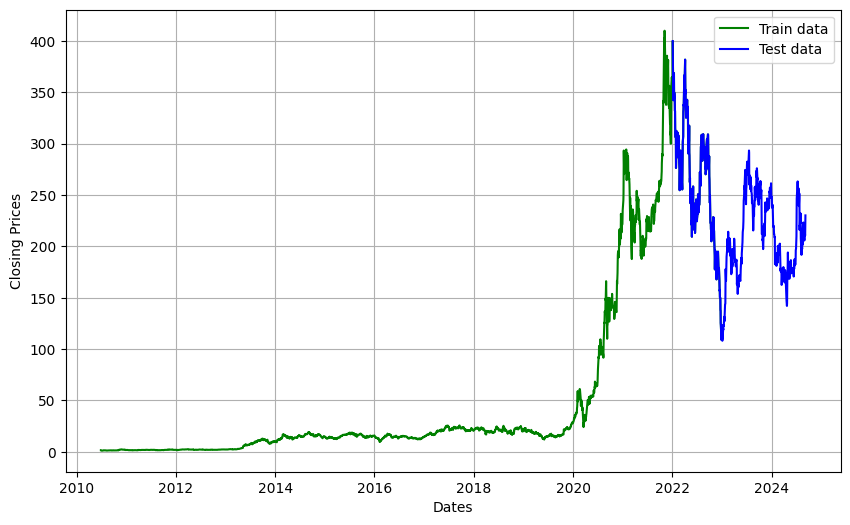

In [ ]:
train_data, test_data = df_close[:'2022'], df_close['2022':]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

In [ ]:
model = ARIMA(train_data, order=(7,1,2))  
fitted = model.fit()  
print(fitted.summary())

c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3150
Model:                 ARIMA(7, 1, 2)   Log Likelihood               -9098.644
Date:                Thu, 05 Sep 2024   AIC                          18217.288
Time:                        22:09:47   BIC                          18277.836
Sample:                             0   HQIC                         18239.013
                               - 3150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0509      0.059    -17.833      0.000      -1.166      -0.935
ar.L2         -0.3912      0.052     -7.520      0.000      -0.493      -0.289
ar.L3         -0.0004      0.011     -0.033      0.9

# bos

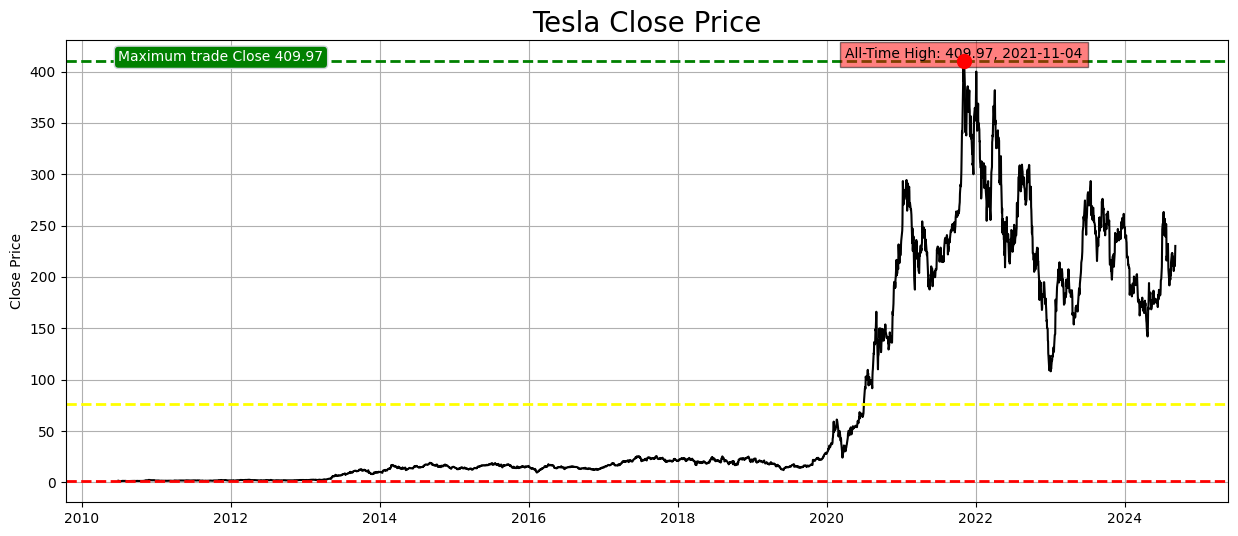

In [ ]:
plot_stockline (tesla_data, 'Close')

In [ ]:
from scipy.stats import boxcox

# Make the target variance stationary
tesla_data['close_boxcos'], lam = boxcox(tesla_data['Close'])
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,close_boxcos
Date,,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500.0,0.0,0.0,2010-06-29 00:00:00-04:00,0.464326
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500.0,0.0,0.0,2010-06-30 00:00:00-04:00,0.461823
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000.0,0.0,0.0,2010-07-01 00:00:00-04:00,0.380445
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000.0,0.0,0.0,2010-07-02 00:00:00-04:00,0.246555
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500.0,0.0,0.0,2010-07-06 00:00:00-04:00,0.071364
...,...,...,...,...,...,...,...,...,...
2024-08-29 00:00:00-04:00,209.800003,214.889999,205.970001,206.279999,62308800.0,0.0,0.0,2024-08-29 00:00:00-04:00,5.189398
2024-08-30 00:00:00-04:00,208.630005,214.570007,207.029999,214.110001,63370600.0,0.0,0.0,2024-08-30 00:00:00-04:00,5.224708
2024-09-03 00:00:00-04:00,215.259995,219.899994,209.639999,210.600006,76500900.0,0.0,0.0,2024-09-03 00:00:00-04:00,5.209044


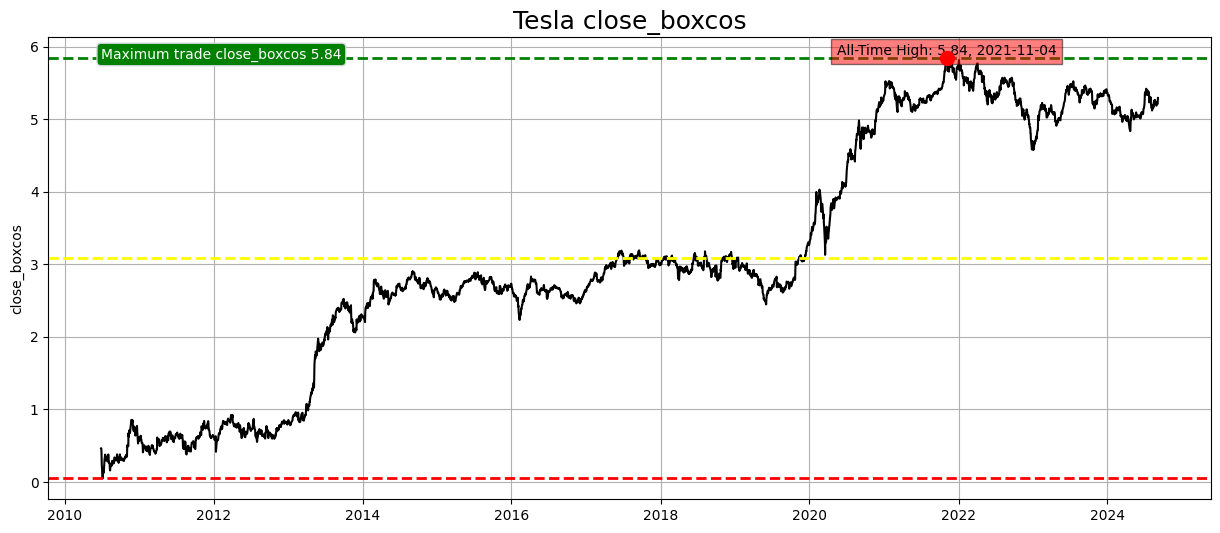

In [ ]:
plot_stockline (tesla_data, 'close_boxcos')

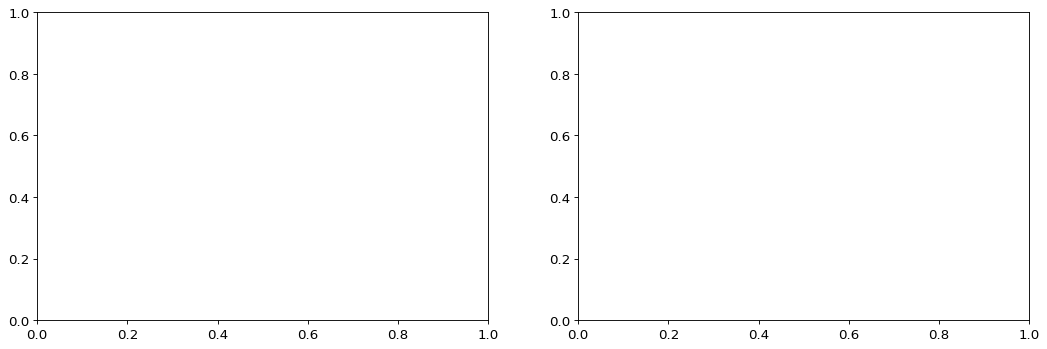

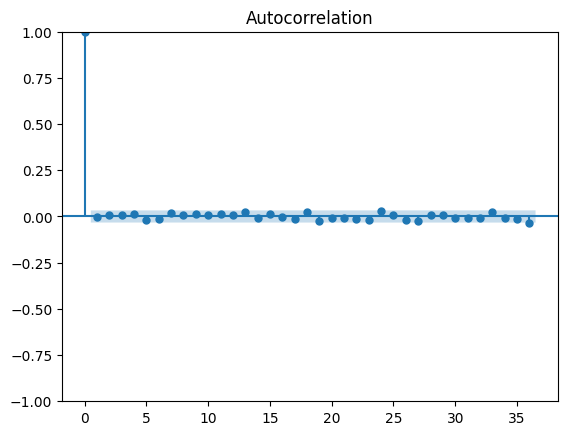

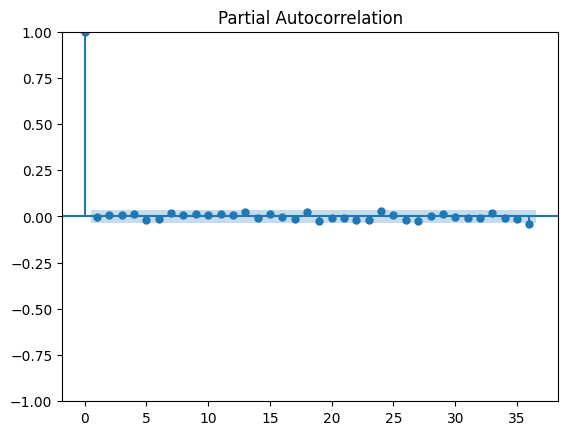

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Difference the tesla_data
tesla_data["close_diff"] = tesla_data["close_boxcos"].diff()
tesla_data.dropna(inplace=True)

# Plot acf and pacf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=80)
plot_acf(tesla_data['close_diff'])
plot_pacf(tesla_data['close_diff'], method='ywm')
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

In [ ]:
train, test = tesla_data[:'2022'], tesla_data['2022':]

In [ ]:
from scipy.special import inv_boxcox

# Build ARIMA model and inverse the boxcox
model = ARIMA(train['close_boxcos'], order=(1, 0, 0)).fit()
boxcox_forecasts = model.forecast(len(test))
forecasts = inv_boxcox(boxcox_forecasts, lam)

c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\temp\virtualenv\python12\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No support

In [ ]:
forecast

Date
2022-01-03 00:00:00-05:00    230.390529
2022-01-04 00:00:00-05:00    230.261252
2022-01-05 00:00:00-05:00    230.454844
2022-01-06 00:00:00-05:00    230.350432
2022-01-07 00:00:00-05:00    230.521074
                                ...    
2024-08-29 00:00:00-04:00    256.064501
2024-08-30 00:00:00-04:00    256.103124
2024-09-03 00:00:00-04:00    256.141746
2024-09-04 00:00:00-04:00    256.180369
2024-09-05 00:00:00-04:00    256.218992
Name: predicted_mean, Length: 672, dtype: float64

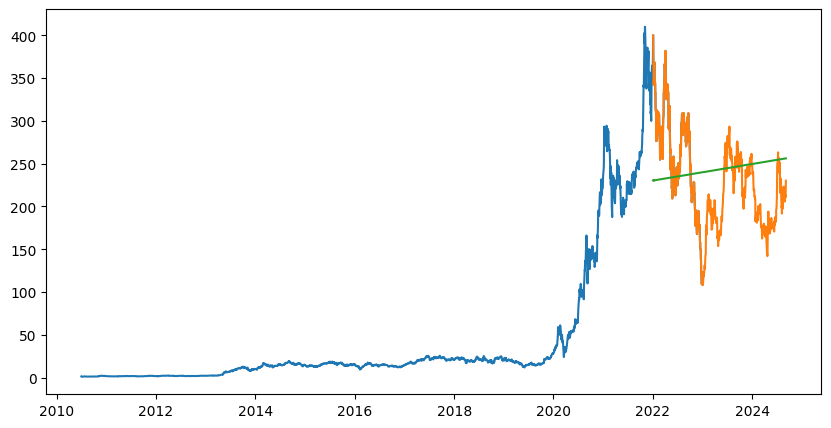

In [ ]:
forecast.index=test.index
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train['Close'], label='Training Data')
plt.plot(test['Close'], label='Test Data')
plt.plot(forecast, label='forecast')

In [ ]:
forecast

2024-09-06 00:00:00-04:00    230.390529
2024-09-09 00:00:00-04:00    230.261252
2024-09-10 00:00:00-04:00    230.454844
2024-09-11 00:00:00-04:00    230.350432
2024-09-12 00:00:00-04:00    230.521074
                                ...    
2027-03-30 00:00:00-04:00    256.064501
2027-03-31 00:00:00-04:00    256.103124
2027-04-01 00:00:00-04:00    256.141746
2027-04-02 00:00:00-04:00    256.180369
2027-04-05 00:00:00-04:00    256.218992
Freq: B, Name: predicted_mean, Length: 672, dtype: float64